### Problem Statement:
**To create the model that can classify the different species of the Iris flower.**

In [1]:
### imprting all the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Unserstanding the dataset**

**Feature Information**
- **SepalLengthCm:** This column represents the length of the sepal (the outermost part of a flower) in centimeters. The sepal is one of the main structures used to describe and classify flowers.

- **SepalWidthCm:** This column represents the width of the sepal in centimeters. It provides information about the breadth or width of the sepal, which is another characteristic used in flower classification.

- **PetalLengthCm:** This column represents the length of the petal (the inner, usually colorful part of a flower) in centimeters. The petal length is an important feature used to distinguish different flower species.

- **PetalWidthCm:** This column represents the width of the petal in centimeters. It provides information about the breadth or width of the petal, which is another crucial characteristic used in flower classification.

- **Species:** This column represents the species or class of the iris flowers. It indicates the specific type or category of each flower observation. The dataset commonly includes three species: Setosa, Versicolor, and Virginica.

In [4]:
### shape of the dataset
df.shape

(150, 6)

In [5]:
### datatype 
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
### all info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
### We dont need ID, so lets drop it
df.drop('Id', axis=1, inplace=True)

In [8]:
### Checking for missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
### checking for duplicates values
df.duplicated().sum()

3

In [10]:
df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'}, inplace=True)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
### gives statistics summary of dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Observations:**
- the range of the SepalLengthCm is: 4.3 - 7.9
- the range of the SepalWidthCm is: 2.0 - 4.4
- the range of the PetalLengthCm is: 1.0 - 6.9
- the range of the PetalWidthCm is: 0.1 - 2.5

### Exploratory Data Analysis(EDA)

In [13]:
df['species'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: species, dtype: float64

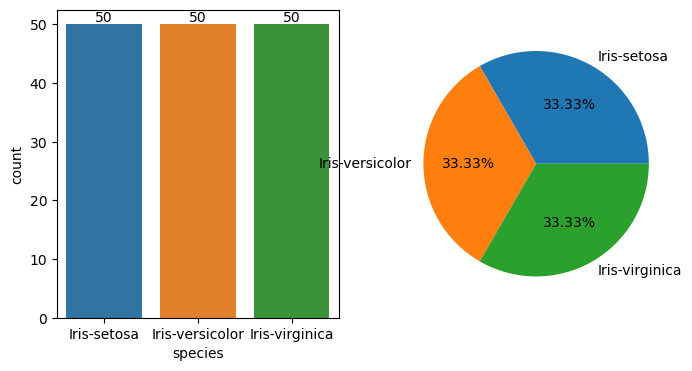

In [14]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
ax = sns.countplot(x = df['species'], data =df)
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,2,2)
target_val = df['species'].value_counts().values
target_name = df['species'].value_counts().index
plt.pie(x=target_val, labels=target_name, autopct = '%1.2f%%')
plt.show()

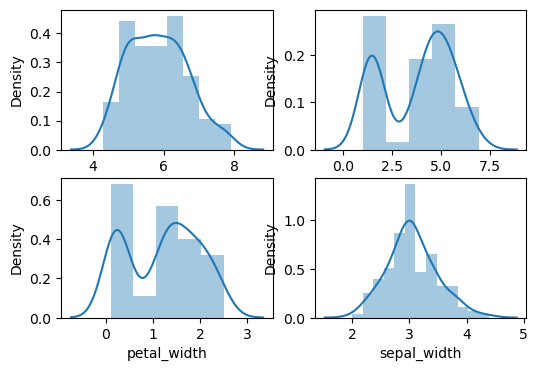

In [15]:
plt.figure(figsize=(6,4))
plt.subplot(2,2,1)
sns.distplot(df["sepal_length"], kde=True)
plt.subplot(2,2,2)
sns.distplot(df["petal_length"], kde=True)
plt.subplot(2,2,3)
sns.distplot(df["petal_width"],  kde=True)
plt.subplot(2,2,4)
sns.distplot(df["sepal_width"], kde=True);

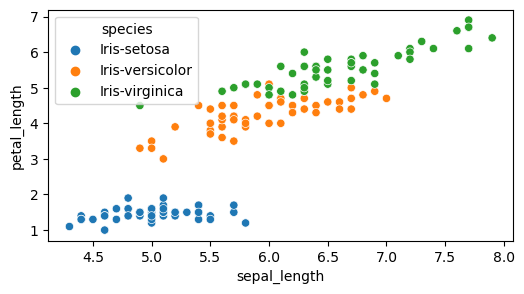

In [16]:
plt.figure(figsize=(6,3))
sns.scatterplot(x='sepal_length', y='petal_length', data=df, hue='species');

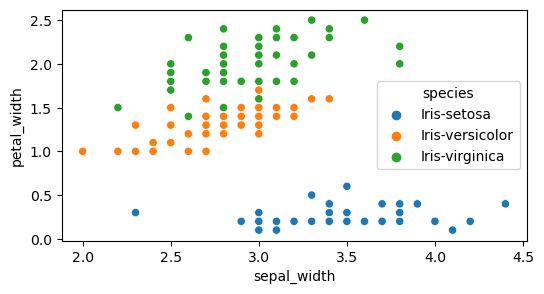

In [17]:
plt.figure(figsize=(6,3))
sns.scatterplot(x='sepal_width', y='petal_width', data=df, hue='species');

<Figure size 500x500 with 0 Axes>

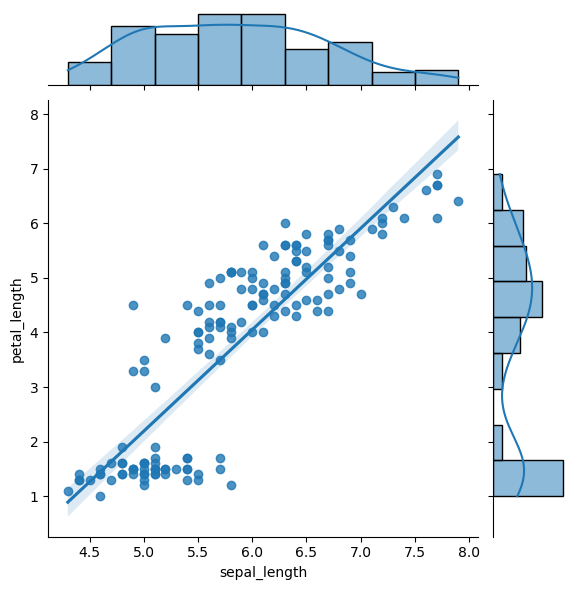

In [18]:
plt.figure(figsize=(5,5))
sns.jointplot(x=df['sepal_length'],y=df['petal_length'],data=df,kind='reg');

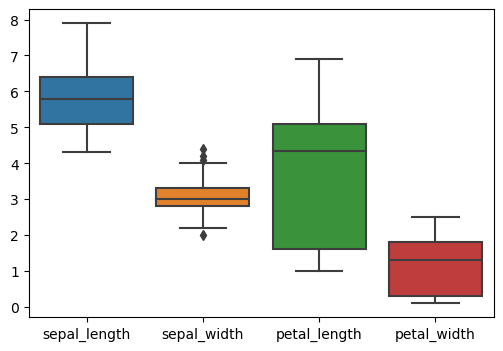

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df);

<Figure size 1000x800 with 0 Axes>

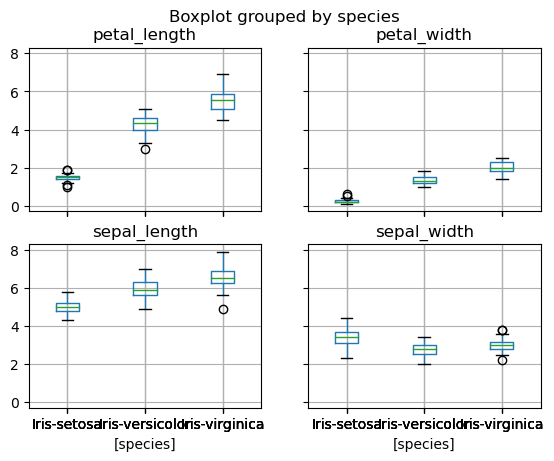

In [20]:
plt.figure(figsize=(10, 8))
df.boxplot(by="species");

<Figure size 600x300 with 0 Axes>

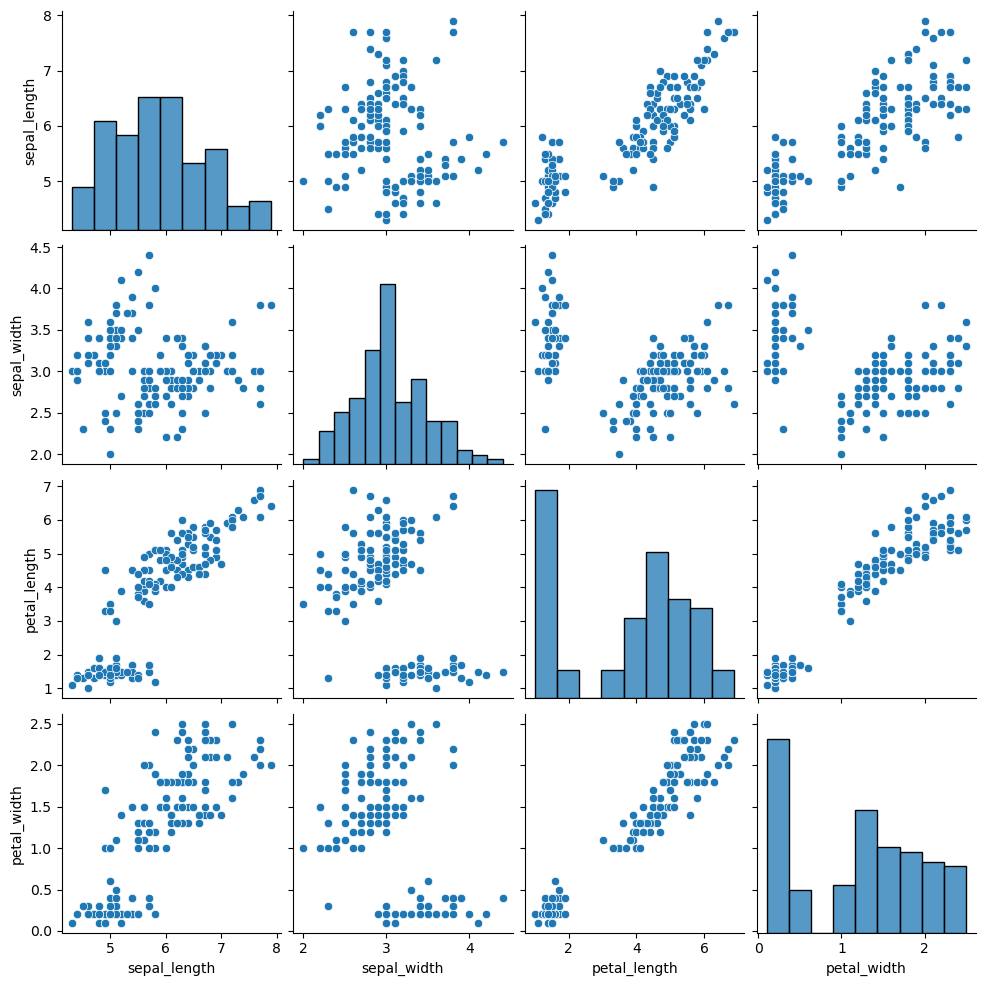

In [21]:
### pair plot
plt.figure(figsize=(6,3))
sns.pairplot(df)

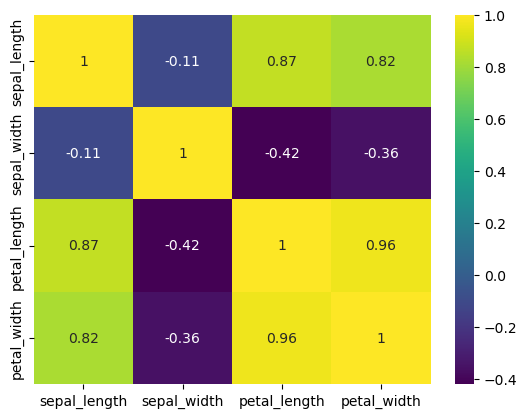

In [22]:
### Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='viridis');

**X & y**

In [23]:
X = df.drop('species', axis=1)
y = df['species']

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Train-Test Split**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [29]:
##Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {'logistic_regression':{'model':LogisticRegression(), 'parameters':{'penalty' : ['l1', 'l2', 'elasticnet', 'none']}},
             
             'decision_tree':{'model':DecisionTreeClassifier(random_state=0), 'parameters':{'criterion':['gini','entropy'],'max_depth':[1,2,3,4]}},
             
             'random_forest':{'model':RandomForestClassifier(random_state=0), 'parameters':{'n_estimators':[5,10,15,20,50,60,100]}},
             
              'xg_boost':{'model':XGBClassifier(), 'parameters':{'n_estimators':[10,20,40], 'max_depth':[3,4,5],'gamma':[0,0.3,0.5,1]}},
             
              'ada_boost':{'model':AdaBoostClassifier(), 'parameters':{'n_estimators':[10,20,40,50]}}}
    
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})
    return pd.DataFrame(scores, columns=['model','best_parameters', 'score'])

find_best_model(X,y)

,model,best_parameters,score
0,logistic_regression,{'penalty': 'l2'},0.973333
1,decision_tree,"{'criterion': 'gini', 'max_depth': 4}",0.966667
2,random_forest,{'n_estimators': 100},0.966667
3,xg_boost,"{'gamma': 0, 'max_depth': 4, 'n_estimators': 10}",0.966667
4,ada_boost,{'n_estimators': 10},0.946667


### Modelling with Logistic Regression

In [30]:
# Using cross_val_score for getting highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X,y, cv=5)
print('Cross validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Cross validation Score:97%


In [31]:
#Creating LogisticRegression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [32]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9666666666666667
Test Accuracy: 1.0


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
import pickle
#create a file, where we want to save the model
file = open('iris_lr.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)